# VIDEO GAMES STUDY PROJECT


 We are working for the on-line store Ice, which sells video games all over the world. Historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from functools import reduce


# Step 1. Open the data file and study the general information.

In [2]:
data = pd.read_csv('/datasets/games.csv')

Data contains the following columns:

Name - Name of the game

Platform - Platform where game was placed

Year_of_Release- Year when game was released

Genre - Genre of the game

NA_sales - North American sales in USD million

EU_sales - Sales in Europe in USD million

JP_sales - Sales in Japan in USD million

Other_sales - Sales in other countries in USD million

Critic_Score - Maximum of 100. Points that critics gave to the game in their review

User_Score - Maximum of 10. Points that users gave to the game in their review

Rating ESRB rating. The Entertainment Software Rating Board evaluates a games content and assigns an age rating such as Teen or Mature.

In [3]:
# printing the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# print a head of data
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We have some problems with data:
1.The columns are not in lowercase, 

2.the type of year_of_release column is float, but should be integer

3.missing values in critic_score,user_score, rating columns and in name, year_of_release,genre,user_score columns.

4.User_Score is object type instead of float type.

# Step 2. Prepare the data

In [5]:
#Changing the names of the columns to lowercase
data.columns = data.columns.str.lower()

#Check that everytning is OK
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
#Dropping 2 rows of missing values with name and genre missing
data.drop(data[data['name'].isna()].index, axis =0, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
#Replacing missing `year_of_release` with minimum value based on `name` column
data['year_of_release'] = data.groupby('name')['year_of_release'].transform('min') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
#Droping the rest of missing values in `year_of_release` column
data.drop(data[data['year_of_release'].isna()].index, axis =0, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
#Changing the type of `year_of_release` column to integer
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [14]:
#lets look at the values we have in `rating` column for different games
data['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [15]:
# Replacing the old ratings:  EC and K-A with E and RP (rating pending) with "unknown" value
data['rating'] = data['rating'].replace(to_replace=['EC', 'K-A'], value='E')
data['rating'] = data['rating'].replace(to_replace='RP', value='unknown')

# Replacing the missing values to "unknown" in order to be able to restore the ratings.
data['rating'] = data['rating'].fillna('unknown')

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           16567 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [16]:
#Check what values we have in `rating` column after changes we made
data['rating'].value_counts()

unknown    6701
E          3969
T          2930
M          1554
E10+       1412
AO            1
Name: rating, dtype: int64

In [17]:
data['user_score'].value_counts()
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [18]:
#Creating the copy of the data without missing values and tbd values in `user_score` column
data_user = data.query('user_score.notna() and user_score !="tbd"').reset_index()

#Changing the type of the column in order to calculate mean values
data_user['user_score'] = data_user['user_score'].astype(float)

#Calculating mean and median values
data_user.pivot_table(index = 'name', values = 'user_score', aggfunc = ['mean','median'])

,mean,median
,user_score,user_score
name,,
Tales of Xillia 2,7.90,7.90
.hack//Infection Part 1,8.50,8.50
.hack//Mutation Part 2,8.90,8.90
.hack//Outbreak Part 3,8.70,8.70
007 Racing,4.60,4.60
...,...,...
inFAMOUS 2,8.40,8.40
inFAMOUS: Second Son,7.90,7.90


In [19]:
#Creating dictionary for user_score
user_score_dict = data_user.groupby('name')['user_score'].mean().to_dict()

#Changing  values in Dictionary to string in order to match type of the column `user_score`
user_score_dict  ={i: str(v) for i, v in user_score_dict.items()}

#Replacing "tbd" values in `user_score` column 
data['user_score']= data.apply(
    lambda x: user_score_dict[x['name']] if x['name'] in user_score_dict and x['user_score']=='tbd'
                                             else x['user_score'] if x['user_score']!='tbd' else np.nan, axis = 1)

In [20]:
#Let's replace nan values with -1. in order to change the type of the column to float. We will take into account that -1 means that there is no rating.
#It is better than 0, because there could be such low points as 0 for some games.
#Replacing missing values in `user_score` column with -1 value
data['user_score'] = data['user_score'].fillna(-1)

#Changing type of user_score` clumn to float
data['user_score'] = data['user_score'].astype(float)

#Check missing values and column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [21]:
#Replacing missing values in `user_score` column with -1 value
data['critic_score'] = data['critic_score'].fillna(-1)

In [22]:
#Check missing values and column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [23]:
#Creating column `total_sales
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1988,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


# Step 3. Analyze the data

Look at how many games were released in different years. Is the data for every period significant?

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

Determine what period you should take data for a prognosis for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms?

Take a look at how user and professional reviews affect sales for one popular platform. Build a scatter plot and calculate the correlation between reviews and sales.

compare the sales of the same games on other platforms.
Take a look at the general distribution of games by genre.


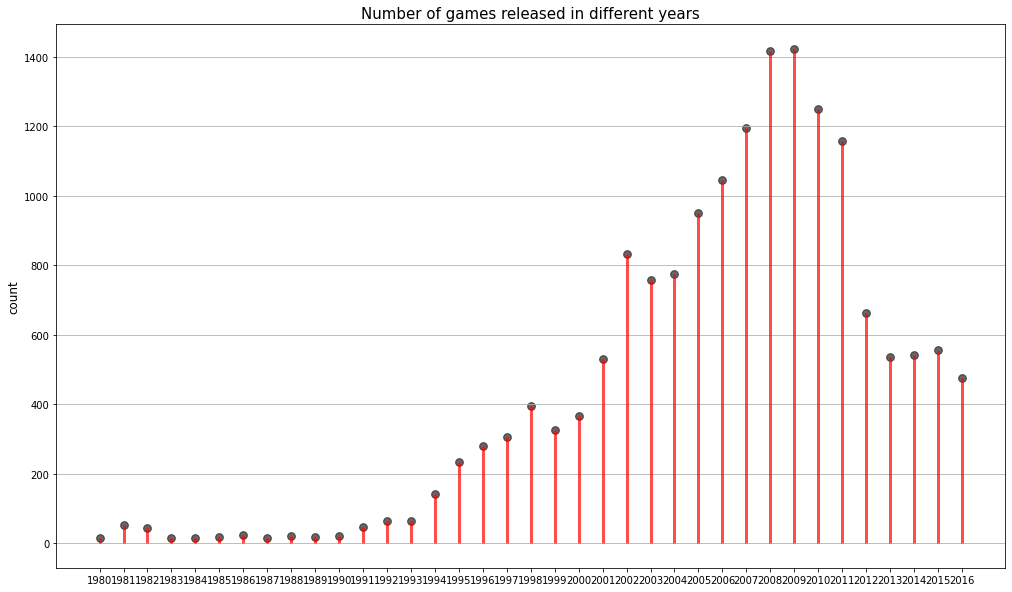

In [24]:
#Creating grouped table with the number of games released in each year
years = data.groupby('year_of_release')['name'].count().reset_index()

#Plotting the graph (scatter plus vertical lines)
fig, ax = plt.subplots(figsize = (17,10))
ax.grid(axis='y')
ax.vlines(x=years.year_of_release, ymin=0, ymax=years.name, color = 'red', linewidth=3, alpha = 0.7)
ax.scatter(x=years.year_of_release, y=years.name, s=60, color='black', alpha = 0.6)
ax.set_title('Number of games released in different years', fontdict={'size':15})
ax.set_xticks(years.year_of_release)
ax.set_ylabel('count',fontdict={'size':12})
plt.show()    

The number of games released in each year is increasing until 2008-2009 years where we have the biggest number of games released, than it decreases. The reason lies in the rapid development of the IT industry in the era of cheap money. Further, after the mortgage crisis of 2007-2008 in the United States, the situation changed, the Fed raised rates and household spending began to decline, so demand for new computer games fell accordingly. In 2012 - 2016 the number of games released in each year is quite constant. So, for our prognosis for 2017 it's better to use data from the last 5 years.

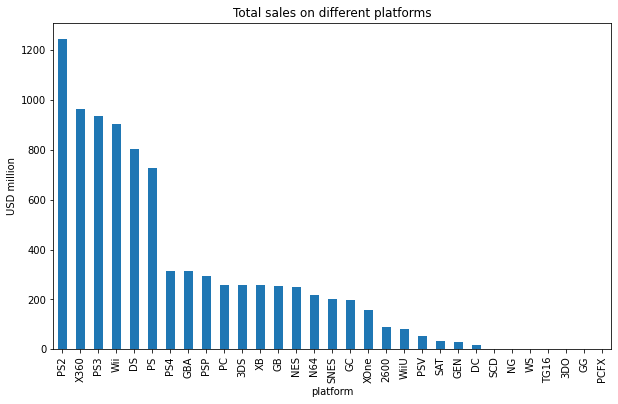

In [25]:
#Creating bar plot which shows the number of sales of different platforms
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(10,6))
plt.title('Total sales on different platforms')
plt.ylabel('USD million')
plt.show()

Playstation is leading if we calculate all the versions of it.

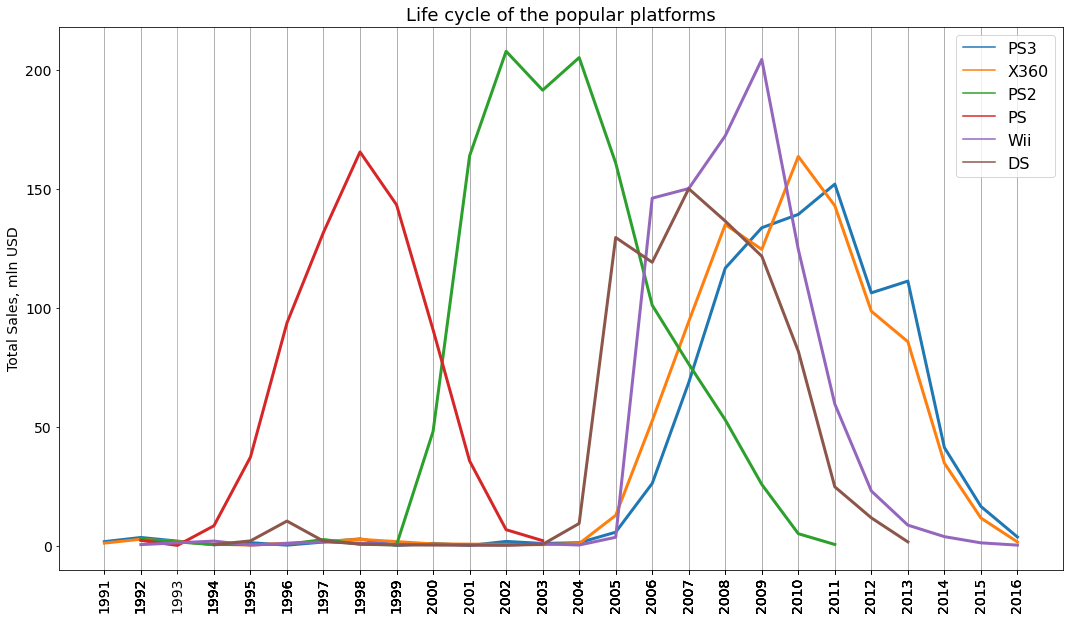

In [26]:
#Grouping the data of sales on the popular platforms from 1990 till 2016.
data_top6_graph = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS") and year_of_release >1990'
    ).groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by = 'year_of_release')

#Plotting the line graph
plt.figure(figsize = (18,10))
ax=sns.lineplot(data = data_top6_graph, x = 'year_of_release', y = 'total_sales', hue ='platform', linewidth=3)
ax.grid(axis='x')
ax.set_title('Life cycle of the popular platforms', fontsize=18)
legend = ax.legend(fontsize=16)
ax.set_ylabel('Total Sales, mln USD', fontsize = 14)
ax.set_xticks(data_top6_graph.year_of_release)
ax.set_xlabel('')
ax.set_xticklabels(data_top6_graph.year_of_release, rotation=90, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()

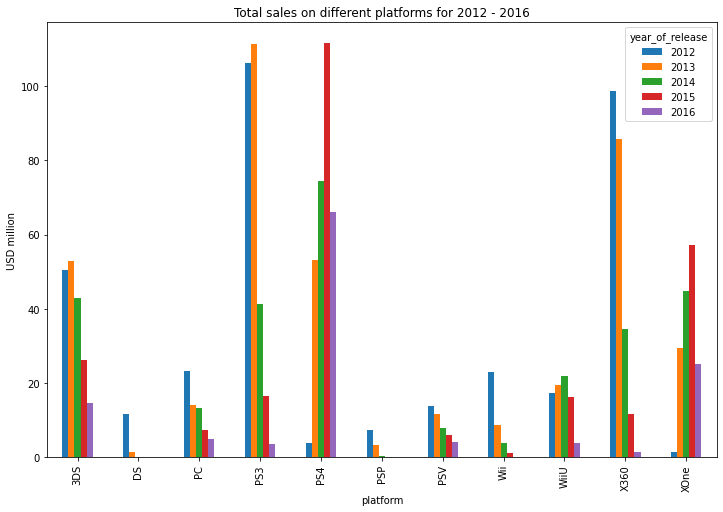

In [27]:
# filter the data for 2012 - 2016 year.
data_recent = data.query('year_of_release >=2012')

#Creating pivot and plotting bar diagram showing the sales on different platforms
data_recent.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(
     kind = 'bar', figsize=(12,8))
plt.title('Total sales on different platforms for 2012 - 2016')
plt.ylabel('USD million')
plt.show()

We can see that the sales on most of the platforms decrease significantly during 2012 - 2016. But still we can expect that PS4 and XOne will be the leaders in 2017.

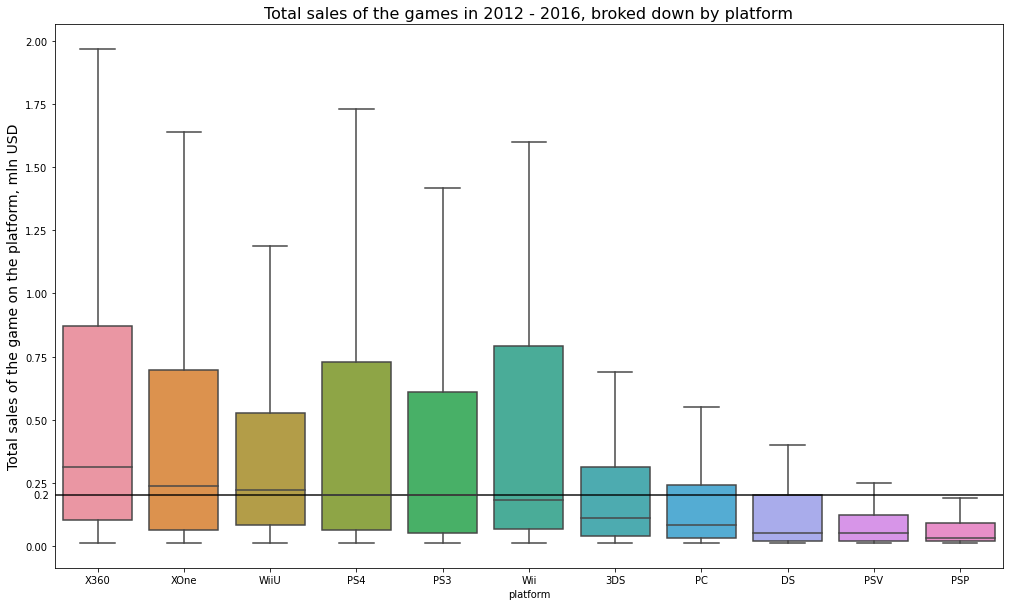

,platform,name,total_sales
809,PS3,Grand Theft Auto V,21.05
2344,X360,Grand Theft Auto V,16.27
1175,PS4,Call of Duty: Black Ops 3,14.63
259,3DS,Pokemon X/Pokemon Y,14.60
715,PS3,Call of Duty: Black Ops II,13.79


In [28]:
#Grouping data on platform and name
data_recent_plat = data_recent.groupby(['platform', 'name'])['total_sales'].sum().reset_index().sort_values(
by = 'total_sales', ascending=False)

#Setting up the order of boxplot form highest median of total sales to lowest
median = data_recent_plat.groupby('platform')['total_sales'].median().sort_values(ascending=False)

#Plotting the boxplot of total sales braking down by platforms
plt.figure(figsize=(17,10))
sns.boxplot(data=data_recent_plat, x='platform', y='total_sales', showfliers=False, order=median.index)

#Plotting horizontal line showing sales of 0.2 mln usd per game.
plt.axhline(y=0.2, linewidth=2, color = 'black', alpha = 0.7)
plt.text(x=-0.75, y=0.19, s='0.2', fontsize=10)

ax = plt.gca()
ax.set_ylabel('Total sales of the game on the platform, mln USD', fontsize=14)
plt.title('Total sales of the games in 2012 - 2016, broked down by platform', fontsize = 16)

plt.show()
data_recent_plat.head(5)



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>We can see that on every platform there are some successful games with very big sales. We have long lines after 75% of sales and we had to switch off outliers. X360,XOne, have the biggest median sales, so the revenue from more than a half of the games on Microsoft platforms is more than 0.25 mln dollars. There are most of successful games on Microsoft platforms. We have 4 platforms which median sales is higher than 0.2 mln dollars, there are PS4 and WiiU besides Microsoft platform. The most successful game is Grand Theft Auto V with 21.05 mln dollars on PS3 and 16,27 mln dollars on X360.

The range of global sales on 11 platforms is very big. There are have several platforms with high level of sales. We can see the long tail on the top of the graph after the third quantile. PS4 and XOne are the leaders of the market. The sales of the most platforms (75% of them) is below 145 mln dollars.

Let's compare the sales of the same games on different platforms:
1. We will build a pivot to see for each game it's sales on different platforms. 
2. Let's calculate totals, sort values in a descending order and then we will chose TOP 5 games which have the biggest sales.
3. Plot diagrams for every game from TOP 5 for visualize the distribution over the platforms. To do so, we need to remove platforms with all 0 values of sales. The popular games may not being sold through all platforms. 
4.Print all pie diagrams for each game in one picture.</b>

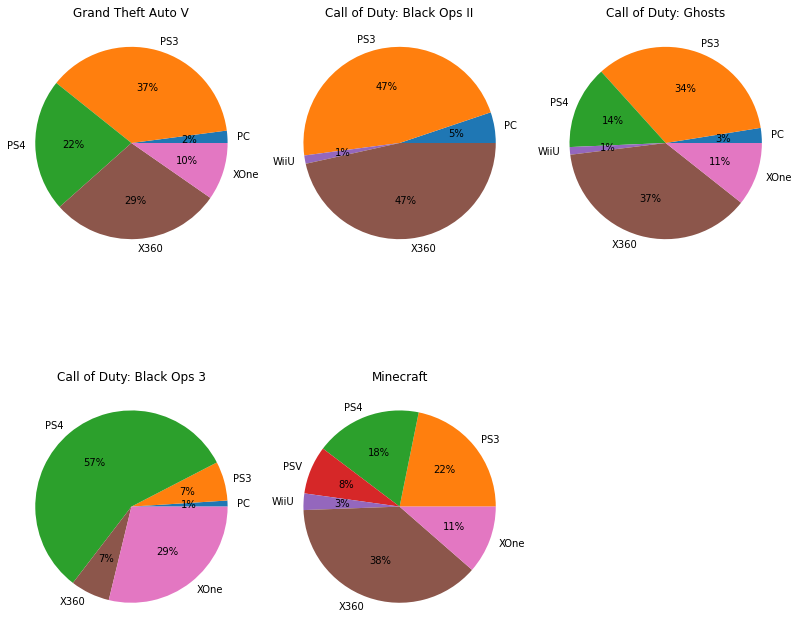

In [29]:
#Building the pivot to compare the sales of the top 5games on different platforms
games_top5 = data_recent.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum',
                   fill_value = 0, margins = True).sort_values(by = "All", ascending = False).head(6)

#Replacing the totals and columns with 0 value in every row
games_top5 = games_top5.drop('All', axis=1)
games_top5 = games_top5[games_top5.index != "All"]
games_top5 = games_top5.drop(games_top5.columns[(games_top5 == 0).all()], axis=1)

#Transpose the pivot and creating variables for names of the platforms and games
games_top5 = games_top5.T
games = games_top5.columns
platforms = games_top5.index

#Defining the function which hides values if there is share below 1%
def my_autopct(pct):
    return '%1.0f%%' % pct if pct > 1 else ''

#Plotting the Pie diagram in one graph
fig, axs = plt.subplots(2, 3, figsize=(11,10), constrained_layout=True)
axs = axs.ravel()
for i, game in enumerate(games):
    values = games_top5[game]
    labels = platforms
    autopct_fmt = lambda x: my_autopct(x) if x > 1 else ''
    labels = np.where(values > 0, labels, '')
    axs[i].pie(values, labels=labels, autopct=autopct_fmt)
    axs[i].set_title(game)
plt.delaxes(axs[5])

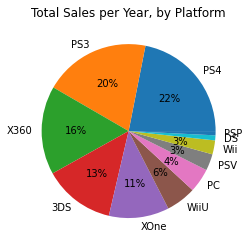

In [30]:
#Grouping the data on platforms and calculating the everage sales per year.
sales_year_platform = data_recent.groupby('platform')['total_sales'].sum().reset_index().sort_values(
    by = 'total_sales', ascending = False)
sales_year_platform['total_sales_per_year'] = sales_year_platform['total_sales'] / 4
sales_year_platform.reset_index(inplace=True)
sales_year_platform

#Plotting the pie diagram
values = sales_year_platform['total_sales_per_year']
labels = sales_year_platform.platform
autopct_fmt = lambda x: my_autopct(x) if x > 1 else ''
labels = np.where(values > 1, labels, '')
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Total Sales per Year, by Platform")
plt.ylabel('')
plt.show()

Now we see that PS4 has much more sales than XOne. We saw that also in other diagrams. The share of PS3,PS4, XOne and X360 is 79%. And 13% for 3DS (Nintendo is pretty big - 4th place). So Nintendo has not much popular games in it, but its share is pretty big in total sales 34 mln dollars per year in average.

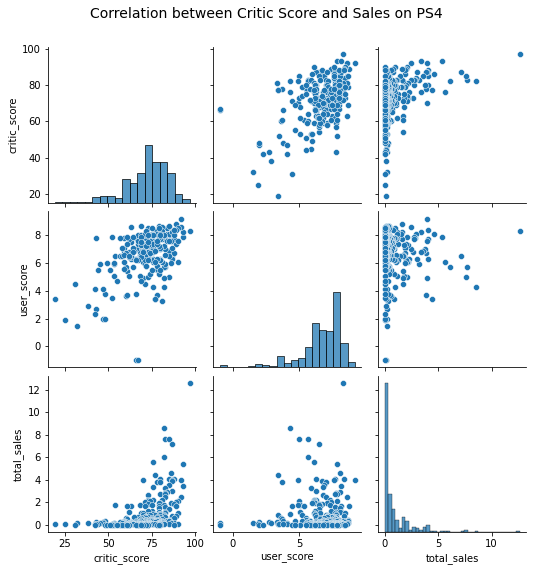

,critic_score,user_score,total_sales
critic_score,1.000000,0.518675,0.415463
user_score,0.518675,1.000000,-0.007695
total_sales,0.415463,-0.007695,1.000000


In [31]:
# Plotting scatter and calculating correlation between critic score and sales on PS4
data_PS4 = data_recent.query('platform=="PS4" and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_PS4)
plt.suptitle('Correlation between Critic Score and Sales on PS4', y=1.05, fontsize=14)
plt.show()
data_PS4.corr()

There is very weak positive correlation between critics reviews and total sales but at the same time there is no correlation between user scores and total sales of PS4 Platform

,critic_score,user_score,total_sales
critic_score,1.000000,0.453788,0.421978
user_score,0.453788,1.000000,-0.057735
total_sales,0.421978,-0.057735,1.000000


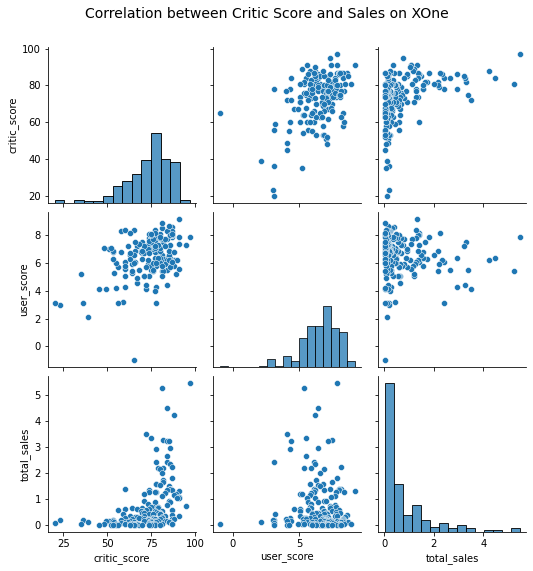

In [32]:
# Plotting scatter and calculating correlation between critic score and sales on XOne
data_XOne = data_recent.query('platform=="XOne"and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_XOne)
plt.suptitle('Correlation between Critic Score and Sales on XOne', y=1.05, fontsize=14)
data_XOne.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.453788,0.421978
user_score,0.453788,1.000000,-0.057735
total_sales,0.421978,-0.057735,1.000000


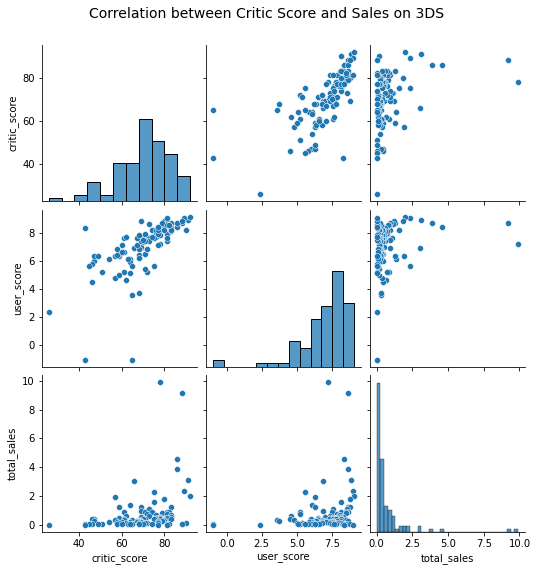

In [33]:
# Plotting scatter and calculating correlation between critic score and sales on 3DS
data_3DS = data_recent.query('platform=="3DS"and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_3DS)
plt.suptitle('Correlation between Critic Score and Sales on 3DS', y=1.05, fontsize=14)
data_XOne.corr()

Sales does not depend on user reviews but there is a weak correlation between critic scores and total sales.

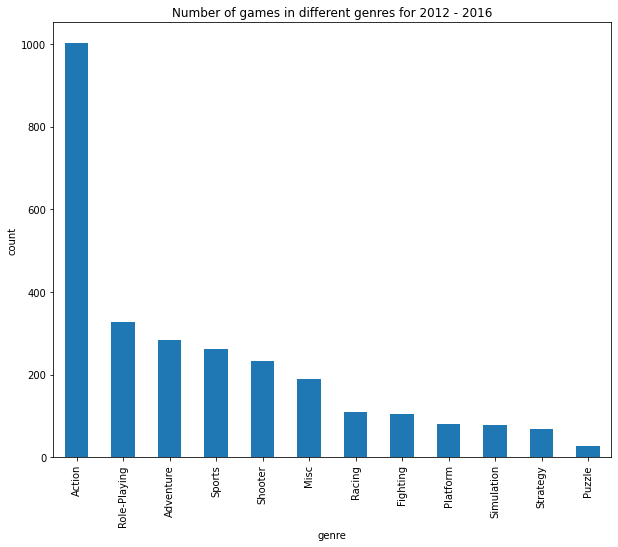

In [34]:
data_recent.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar', figsize=(10,8))
plt.title('Number of games in different genres for 2012 - 2016')
plt.ylabel('count')
plt.show()

We see that the most of the games are action other genres are not so popular. There is about a 1000 action games and the Role-playing genre which has the second place

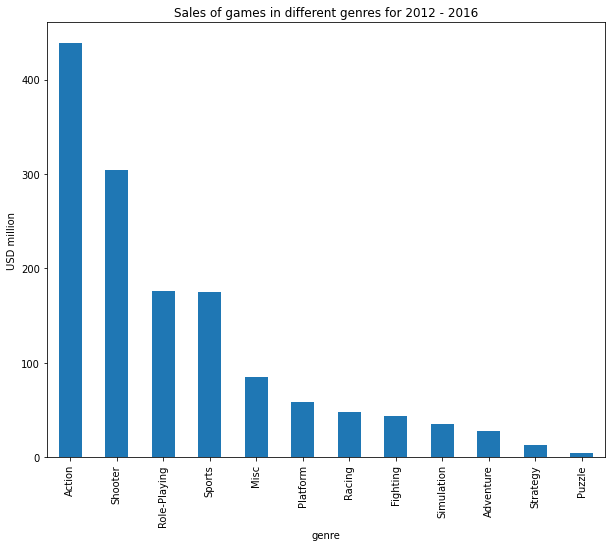

In [35]:
#Let's look at the revenue from different genres.
data_recent.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize=(10,8))
plt.title('Sales of games in different genres for 2012 - 2016')
plt.ylabel('USD million')
plt.show()

shooter games are the most expensive.

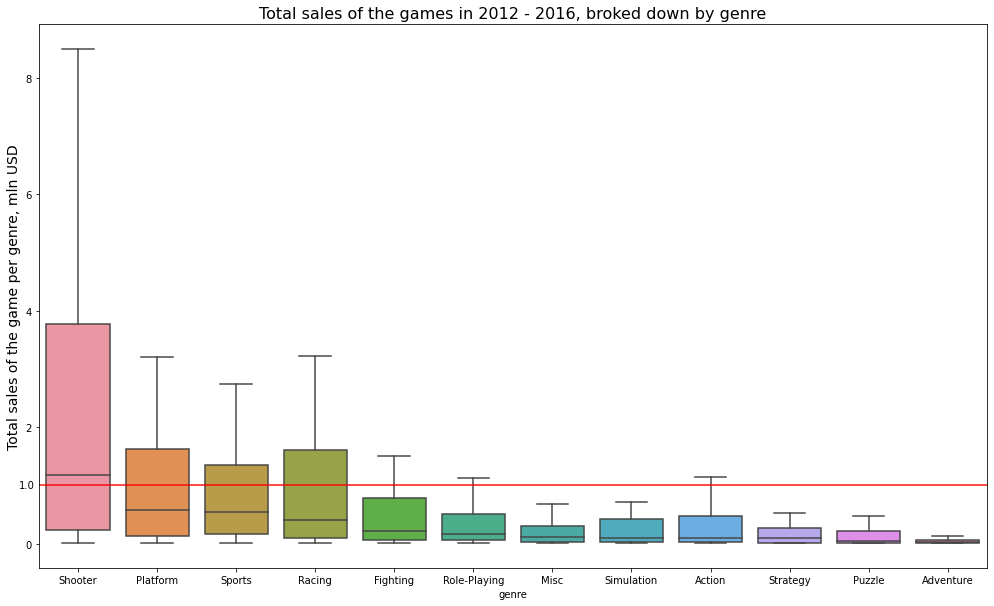

,genre,name,total_sales
190,Action,Grand Theft Auto V,56.58
1295,Shooter,Call of Duty: Black Ops II,29.40
1296,Shooter,Call of Duty: Ghosts,27.39
1294,Shooter,Call of Duty: Black Ops 3,25.67
875,Misc,Minecraft,24.16


In [36]:
#Grouping the data on names and genres and calculating total sales
data_genre = data_recent.groupby(['genre', 'name'])['total_sales'].sum().reset_index().sort_values(
    by ='total_sales', ascending = False)

#Creating the order of the boxplots according to median sales
median = data_genre.groupby('genre')['total_sales'].median().sort_values(ascending=False)

#Plotting the graph
plt.figure(figsize=(17,10))
sns.boxplot(data=data_genre, x='genre', y='total_sales', showfliers=False, order=median.index)

#Plotting horizontal line showing sales of 1 mln usd per game.
plt.axhline(y=1, linewidth=2, color = 'red', alpha = 0.7)
plt.text(x=-0.75, y=0.95, s='1.0', fontsize=10)

ax = plt.gca()
ax.set_ylabel('Total sales of the game per genre, mln USD', fontsize=14)
plt.title('Total sales of the games in 2012 - 2016, broked down by genre', fontsize = 16)

plt.show()
plt.show()
data_genre.head(5)

The average sales of one shooter game is about 1 mln dollars for 5years, sales of one game of other genres is less. Although we have not many different shooter games, but they have very good sells. 
The most of genres have small number of games that are being sold well. 
There are long tails after the 75% of the games almost in each genre. 
The best sales has Action "Grand Theft Auto V".
We have 2 leaders in genres. We have many action games and sales of action game is the biggest, but we also have shooter games where there is not so many different games, but each game is being sold very good.

# Step 4. Create a user profile for each region 

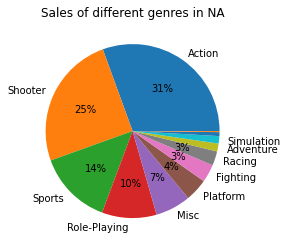

In [37]:
#Let's find TOP 5 genres in NA. Grouping the data in genres
na_top5g = data_recent.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)

#Defining the values and lables
values = na_top5g['na_sales']
labels = na_top5g.genre

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in NA
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in NA")
plt.ylabel('')
plt.show()

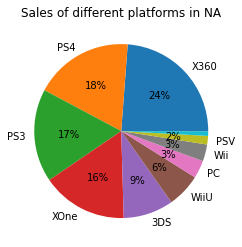

In [38]:
#Let's find out TOP 5 platforms in NA region. Grouping the data in platforms
na_top5p = data_recent.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)

#Defining the values and lables
values = na_top5p['na_sales']
labels = na_top5p.platform

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in NA
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in NA")
plt.ylabel('')
plt.show()

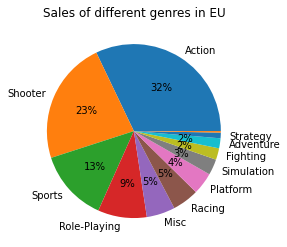

In [39]:
##Let's find TOP 5 genres in EU. Grouping the data in genres
eu_top5g = data_recent.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)

#Defining the values and lables
values = eu_top5g['eu_sales']
labels = eu_top5g.genre

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in EU
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in EU")
plt.ylabel('')
plt.show()

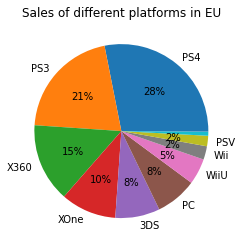

In [40]:
#Grouping the data in platforms. Let's find out TOP 5 platforms in EU
eu_top5p = data_recent.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)

#Defining the values and lables
values = eu_top5p['eu_sales']
labels = eu_top5p.platform

#Hiding labels with small share
labels = np.where(values >5.8, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in EU
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in EU")
plt.ylabel('')
plt.show()

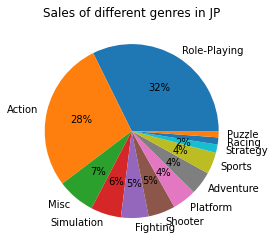

In [41]:
#Grouping the data in genres in Japan.
jp_top5g = data_recent.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)

#Defining the values and lables
values = jp_top5g['jp_sales']
labels = jp_top5g.genre

#Hiding labels with small share
labels = np.where(values >2, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in JP
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in JP")
plt.ylabel('')
plt.show()

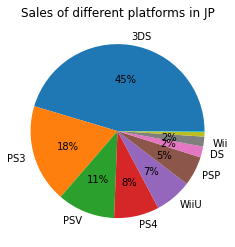

In [42]:
#Grouping the data in platforms in Japan
jp_top5p = data_recent.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)

#Defining the values and lables
values = jp_top5p['jp_sales']
labels = jp_top5p.platform

#Hiding labels with small share
labels = np.where(values >3, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in JP
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in JP")
plt.ylabel('')
plt.show()



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Here are the ratings for JP region. Let's determine TOP 5 genres: Role-Playing (32% of Sales), Action (28%), Misc (7%), Fighting (5%), and Shooter (5%).TOP 5 platforms: 3DS (45% of Sales), PS3 (18%), PSV (11%), PS4 (8%), and WiiU (7%)
We see the significant changes of users behavior in Japan, because of cultural differences with western countries in NA and EU. While Action is still popular and its share of sales is high like in NA and EU, the most popular genre is Role-playing with its share 32% of Sales. However, distribution of platforms is very different, japanese platforms have the whole market. Nintendo is the leader with its share of total sales in the region 45%, Sony platforms have the share 37% of the market and WiiU has7%, rather big if we compare with NA and EU regions where its share is little. And there is no Microsoft platforms on Japan video games market.</b>

# Do ESRB ratings affect sales in individual regions?

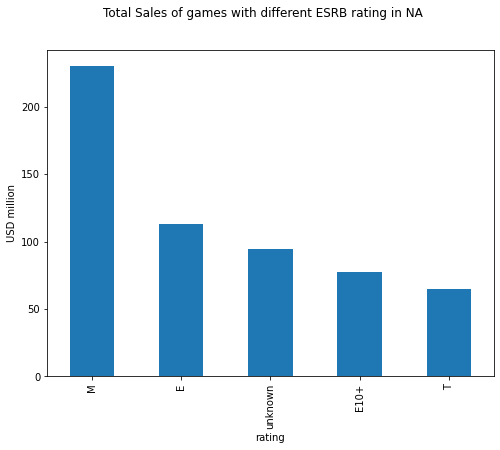

In [43]:
# Grouping the data by rating to see the sales in NA region
data_na = data_recent.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_na.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in NA')
plt.ylabel('USD million')
plt.show()

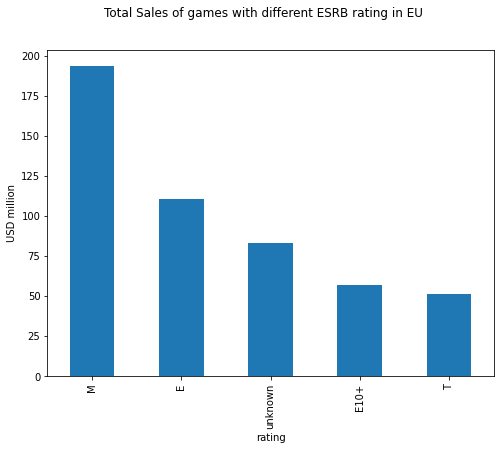

In [44]:
# Grouping the data by rating to see the sales in EU region
data_eu = data_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_eu.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in EU')
plt.ylabel('USD million')
plt.show()

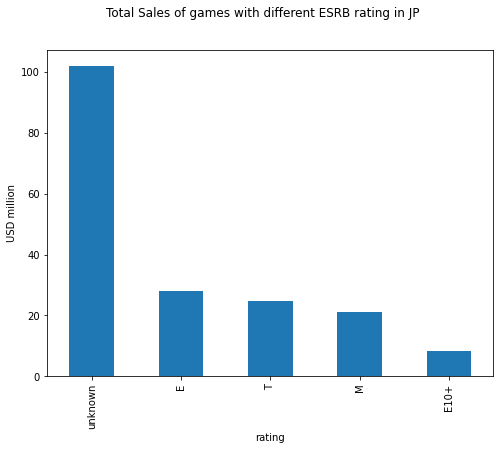

In [45]:
# Grouping the data by rating to see the sales in jp region
data_jp = data_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_jp.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in JP')
plt.ylabel('USD million')
plt.show()



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>My conclusion is that the best-selling games in Japan are games without a rating. The effect of ESRB rating on regional sales is not so strong, as it is in Europe and North America, so in Japan rating doesn't have that much meaning. NA and EU region total sales depends on ESRB rating of the games very well. The best selling games have M ratings, so they are fore people over 17 years old, perhaps in Japan the average portrait of a player is younger than European or American. In Japan the effect of ESRB rating on regional sales is not so strong and best selling are games without a rating.</b>

# Step 5. Test the hypotheses

1. hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

H0: The difference between average user ratings of the Xbox One and PC platforms are statistically insignificant.

H1: The difference between average user ratings of the Xbox One and PC platforms are statistically significant.



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b> We will choose the statistical significance level 5%(alpha=0.05), because it will be suitable for holding the Student test with equal variation in order that our results will be more accurate.</b>

In [46]:
#Creating 2 grupes of the data
data_XOne = data_recent.query('platform=="XOne"and user_score != -1')['user_score']
data_PC = data_recent.query('platform=="PC"and user_score != -1')['user_score']

#Calculating mean and variance of the data groups
print('Mean user scores for XOne platform is', np.mean(data_XOne), 
      'Variance is', np.var(data_XOne))
print('Mean user scores for PC platform is', np.mean(data_PC), 
      'Variance is', np.var(data_PC))

Mean user scores for XOne platform is 6.508967391304348 Variance is 1.8975418685018903
Mean user scores for PC platform is 6.408695652173913 Variance is 2.714706994328922


In [47]:
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_XOne, data_PC, equal_var=True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Users score of XOne and PC platforms differ from each other")
else:
    print("We can't reject the null hypothesis. The difference between average user ratings of the Xbox One and PC platforms are statistically insignificant.")

p-value:  0.5182315167270017
We can't reject the null hypothesis. The difference between average user ratings of the Xbox One and PC platforms are statistically insignificant.


2.Average user ratings for the Action and Sports genres are different.
H0: Difference in average user scores for the Action and Sports genres is statistically insignificant.
H1: Difference in average user scores for the Action and Sports genres is statistically significant, action genre games have higher user scores.

In [48]:
#Creating 2 groupes of the data
data_action = data_recent.query('genre=="Action"and user_score != -1')['user_score']
data_sports = data_recent.query('genre=="Sports"and user_score != -1')['user_score']

#Calculating mean and variance of the data groups
print('Mean user scores for Action genre is', np.mean(data_action), 
      'Variance is', np.var(data_action))
print('Mean user scores for Sports genre is', np.mean(data_sports), 
      'Variance is', np.var(data_sports))

Mean user scores for Action genre is 6.792362399505257 Variance is 1.9177454703982004
Mean user scores for Sports genre is 5.370370370370369 Variance is 2.912055525735075


In [49]:
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_sports, data_action, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Difference in users score of action and sports genres is \
statistically significant")
else:
    print("We can't reject the null hypothesis. There is a probability that diffrence in users scores of action \
and sports genres is statistically insignificant")
    
# Test alternative hypothesis
alpha = 0.05  
results = st.ttest_ind(data_sports, data_action, equal_var=False, alternative = 'greater')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the alternative hypothesis. Users scores for action games is statistically \
lower than for sports games")
else:
    print("We can't reject the alternative hypothesis. Users scores for action games \
is statistically higher than for sports games")    

p-value:  5.854809375405209e-23
We reject the null hypothesis. Difference in users score of action and sports genres is statistically significant
p-value:  1.0
We can't reject the alternative hypothesis. Users scores for action games is statistically higher than for sports games


In [51]:


#H0: The mean user score of action and sport games do not differ.

# H1: The mean user score of action games is higher than the mean user score of sports games.



alpha = 0.05  
results = st.ttest_ind(data_action, data_sports, equal_var=False, alternative = 'greater')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Users scores for action games is statistically \
higher than for sports games")
else:
    print("We can't reject the null hypothesis. Users scores for action and sports games \
are  not statistically different")    

p-value:  2.9274046877026047e-23
We reject the null hypothesis. Users scores for action games is statistically higher than for sports games


# General conclusion

<div class="alert alert-info"; style="border-left: 7px solid blue">
We have made the Game project anatysis and forecast for the store "Ice". Purpose of the analysis was to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns and to determine the factors which make the games more successful.
Data preprocessing.
The columns were not in lowercase, the type of year_of_release column was float, also we had many missing important values. The task of this stage was to solve issues:
1.269 missing values in 'year_of_release' we restored using the minimum value of that game, but 146 rows of missing values left. 2.We droped them (less than 1% of data). 
3.Missing values in 'rating', 'critic_score' and 'user_score'. These columns had 50% of the data missing, so it impossible to drop them. For rating column we replaced the old ratings: EC and K-A with E and RP (rating pending) with "unknown". Also we marked missing values as 'unknown' and for users and critic score we marked them as -1, because other data values in those columns are positive.So, we can evaluate patterns for users and critic score and we can differ scores where we have no info about it in our DataFrame from other scores. 
Data analysis.
Number of games released per year increased until 2009 year, after the economical crysis the number of games decreases.
In 2012 - 2016 there is almost the same number of games released in each year. I decided for 2017 forecast to use this relevant data for 5 years.Our analysis of 6 platforms shows that it takes usually from 1 to 3 years for platform to reach high level of sales and it can be on that high level up to 4 years.
Among the platforms we see PS4 and XOne reach it's best sales in 2015 year and their sales decrease in 2016. So we can expect that their sales will be the best next year. The 'life cycle' of the games became shorter. 
I recommend to develop new platforms in 2017, because sales on old ones began to decrease. 
I also expect that PS4 and XOne will be the leader platforms in 2017.
The most popular games are "Call of Duty", "Minecraft" and "Grand Theft Auto".

How the sales depend on user or critic score in their reviews?
There is no strong correlation between that factors, so the total game sales do not depend on users reviews but there is weak positive correlation between critic scores and total sales.

The top game genres are Action and Shooter.
The action games are very various and their sales are the huge.
The shooter games are not so various, and each game itself sells very good, so the total sales of shooter games are on the second place. Accordingly, I suggest in 2017 to invest more in the promotion of Action games than in Shooters, since in this case the effectiveness of advertising campaigns will be higher.

User profile for each region - NA, EU, Japan.
the TOP five platforms for NA: X360-24%;PS4-18%;PS3-17%;Xone-16%;3DS-9%
the TOP five genres for NA: Action-31%;Shooters-25%;Sport-14%;Role-Playing -10%;Misc-7%
the TOP five platforms for EU: PS4-28%;PS3-21%;X360-15%;Xone-10%;3DS-8%
the TOP five genres for EU: Action-32%;Shooters-23%;Sport-13%;Role-Playing -3%;Misc-5%
the TOP five platforms for JP:3DS-45%;PS3-18%;PSV-11%;PS4-8%;WiiU-7%;(X360-0%;Xone-0%)
the TOP five genres for JP: Role-Playing -32%;Action-28%;Misc-7%;Simulation-6%;Fighting-5%.
So we see that Action is very popular in NA and EU and in JP the most popular genre is Role-playing. Thus, it can be concluded that player's genre preferences are roughly similar in North America and Europe, and quite different in Japan. In accordance with these cultural differences, we need to build our marketing policy in  ICE on line store.
Platforms preferences are absolutely different betweeen regions. In JP the japan platforms occupy the majority of the market.  3DS Nintendo is the leader with its share almost the half of total sales in the Japan region -45%, Sony platforms have the share of 37% of the market and WiiU has 7%, rather big if we compare with NA and EU regions where its share is very poor. And there is no Microsoft platforms on Japan market. In NA and EU regions the TOP genres are Action and Shooter and Sports. 
The Share of Sony  is about 49% in EU, about 35% in NA.

How ESRB ratings affect sales in individual regions.
1.In NA and EU region total sales depend on ESRB rating of the games. The best selling games have M -mature ratings, so they are fore people over 17 years old,  perhaps in Japan the average portrait of a player is younger than European or American(under 17 years old). In Japan the effect of ESRB rating on regional sales is not so strong and best selling are games without a rating.

Test the hypotheses
We will choose the statistical significance level 5%(alpha=0.05), because it will be suitable for holding the Student test.    
We checked hypotheses in order to make a conclusion whether the difference in average user ratings of the Xbox One and PC platforms is statistically insignificant and whether action genre games have statistically higher users ratings than sports games. 
I used the Student test to check this. The test's result has showed the following:
    1.We can't reject the null hypothesis. The difference between average user ratings of the Xbox One and PC platforms are statistically insignificant.
    2.We reject the null hypothesis. Difference in users score of action and sports genres is statistically significant,
we can't reject the alternative hypothesis. Users scores for action games is statistically higher than for sports games.